In [13]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

In [14]:
img1 = cv2.imread('./Final Image Folder/image 1.jpeg')
img2 = cv2.imread('./Final Image Folder/image 2.jpeg')
img3 = cv2.imread('./Final Image Folder/image 3.jpeg')
img4 = cv2.imread('./Final Image Folder/image 4.jpeg')
img5 = cv2.imread('./Final Image Folder/image 5.jpeg')
img6 = cv2.imread('./Final Image Folder/image 6.jpeg')
img7 = cv2.imread('./Final Image Folder/image 7.jpeg')
img8 = cv2.imread('./Final Image Folder/image 8.jpeg')
img9 = cv2.imread('./Final Image Folder/image 9.jpeg')
img10 = cv2.imread('./Final Image Folder/image 10.jpeg')

In [15]:
images = [img1,img2,img3,img4,img5,img6,img7,img8,img9,img10]

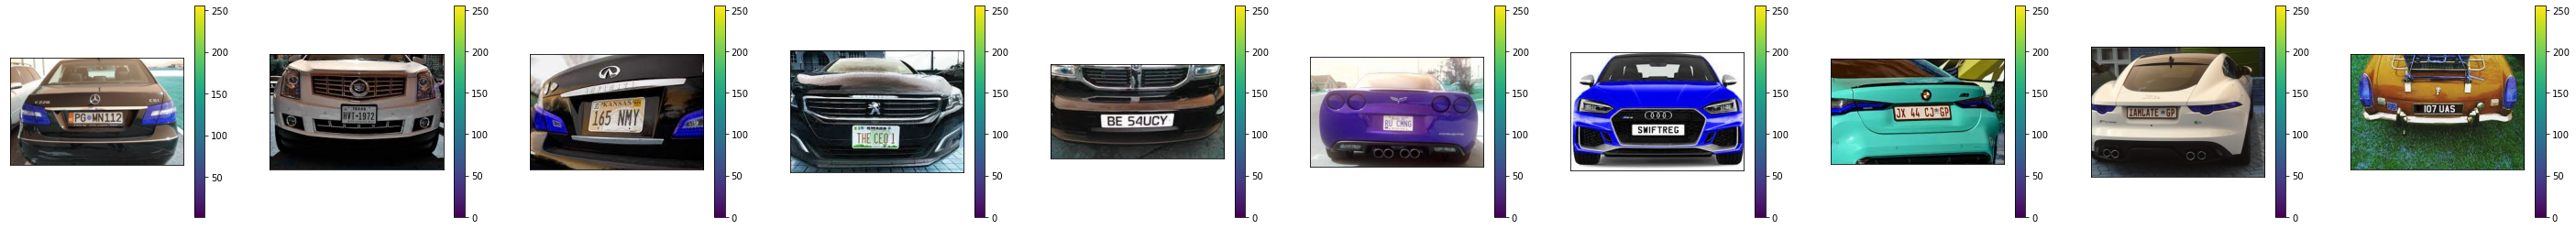

In [17]:
plt.figure(figsize=(50,50))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.colorbar()
plt.show()

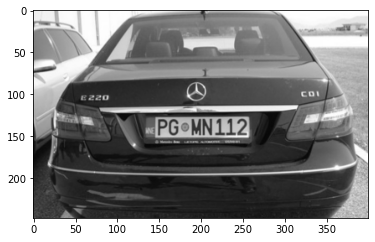

In [18]:
img = cv2.imread('./Final Image Folder/image 1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

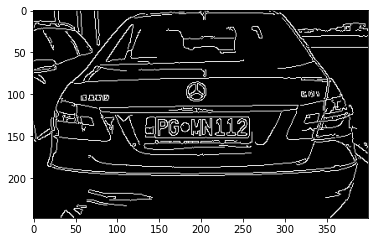

In [19]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [20]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [21]:
cation = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [22]:
location

array([[[146, 128]],

       [[256, 127]],

       [[258, 149]],

       [[147, 152]]], dtype=int32)

In [23]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

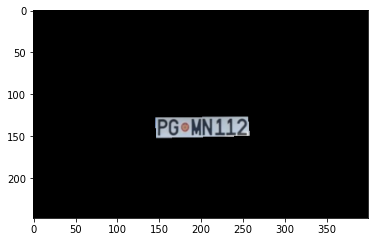

In [24]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [25]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

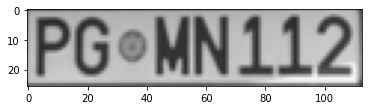

In [26]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [27]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [113, 0], [113, 26], [0, 26]], 'PGoMN112', 0.7092827764434613)]

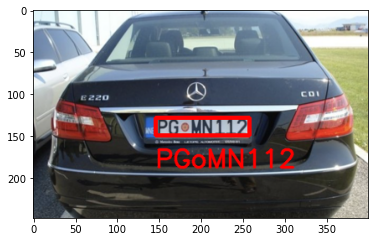

In [28]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))